In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model as lm
import math
import matplotlib.pyplot as plt
%matplotlib inline
import operator
from itertools import product
from MarkovianEM import MarkovianEM

In [2]:
file = pd.ExcelFile('mergedData_v4.xlsx')
data = file.parse(file.sheet_names[0])
data.sort_values(by = ['Date'],ascending = [True])
data2 = data.loc[:,['Date','FED_Eff','CPI','Unemployment']]

In [3]:
data2.head(10)

,Date,FED_Eff,CPI,Unemployment
0,1995-01-31,5.53,150.5,5.6
1,1995-02-28,5.92,150.9,5.4
2,1995-03-31,5.98,151.2,5.4
3,1995-04-30,6.05,151.8,5.8
4,1995-05-31,6.01,152.1,5.6
5,1995-06-30,6.00,152.4,5.6
6,1995-07-31,5.85,152.6,5.7
7,1995-08-31,5.74,152.9,5.7
8,1995-09-30,5.80,153.1,5.6
9,1995-10-31,5.76,153.5,5.5


In [9]:
# m = data2.loc[pd.notnull(data2.Change)].copy()
m = data2.copy()

p=12

m = m.loc[range(0,m.shape[0],p),]


m['logFED_Eff'] = np.log(m['FED_Eff']/100+1)*100
m['Change_logFED_Eff'] = m['logFED_Eff'].diff()
m['ChangePct_logFED_Eff'] = m['Change_logFED_Eff']/m['logFED_Eff']
m['Inflation'] = m['CPI'].diff()/m['CPI']
m['Change_Unemployment'] = m['Unemployment'].diff()
# m['logChangePct_logFED_Eff'] = np.log(m['ChangePct_logFED_Eff']+1)
m.fillna(0,inplace = True)
m.head(15)

,Date,FED_Eff,CPI,Unemployment,logFED_Eff,Change_logFED_Eff,ChangePct_logFED_Eff,Inflation,Change_Unemployment
0,1995-01-31,5.53,150.500,5.6,5.382509,0.000000,0.000000,0.000000,0.0
12,1996-01-31,5.56,154.700,5.6,5.410933,0.028424,0.005253,0.027149,0.0
24,1997-01-31,5.25,159.400,5.3,5.116829,-0.294104,-0.057478,0.029486,-0.3
36,1998-01-31,5.56,162.000,4.6,5.410933,0.294104,0.054354,0.016049,-0.7
48,1999-01-31,4.63,164.700,4.3,4.526013,-0.884919,-0.195519,0.016393,-0.3
60,2000-01-31,5.45,169.300,4.0,5.306672,0.780659,0.147109,0.027171,-0.3
72,2001-01-31,5.98,175.600,4.2,5.808021,0.501349,0.086320,0.035877,0.2
84,2002-01-31,1.73,177.700,5.7,1.715206,-4.092815,-2.386195,0.011818,1.5
96,2003-01-31,1.24,182.600,5.8,1.232375,-0.482831,-0.391789,0.026835,0.1
108,2004-01-31,1.00,186.300,5.7,0.995033,-0.237342,-0.238527,0.019860,-0.1


(array([ 1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,
         1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  2.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 4.   ,  4.058,  4.116,  4.174,  4.232,  4.29 ,  4.348,  4.406,
         4.464,  4.522,  4.58 ,  4.638,  4.696,  4.754,  4.812,  4.87 ,
         4.928,  4.986,  5.044,  5.102,  5.16 ,  5.218,  5.276,  5.334,
         5.392,  5.45 ,  5.508,  5.566,  5.624,  5.682,  5.74 ,  5.798,
         5.856,  5.914,  5.972,  6.03 ,  6.088,  6.146,  6.204,  6.262,
         6.32 ,  6.378,  6.436,  6.494,  6.552,  6.61 ,  6.668,  6.726,
  

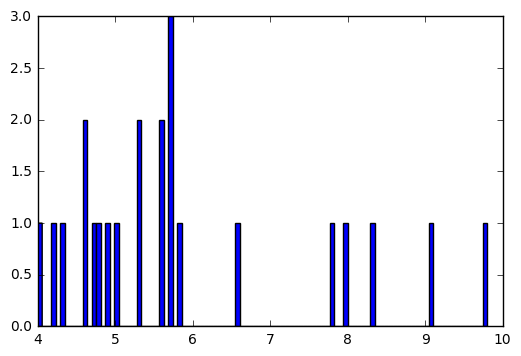

In [5]:
plt.hist(m.Unemployment,100)

In [54]:
target = ['Change_logFED_Eff','Inflation','Change_Unemployment']

df,MU, SIGMA, P, likelihoodList, rList= MarkovianEM(data = m, target = target, N_state = 6,itemax = 200,llambda = 0.000000001)

50.0%
100.0%


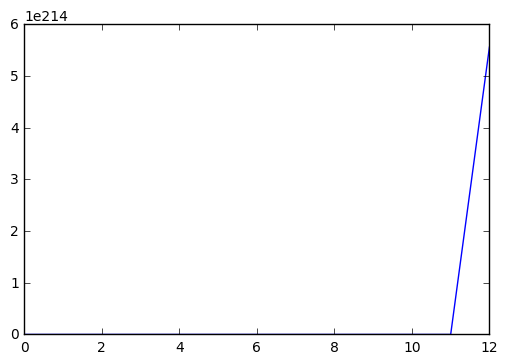

In [55]:
plt.plot(likelihoodList)

In [44]:
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
MU

array([[1.175, 0.027, -0.336],
       [-1.725, 0.011, 2.206],
       [-3.498, 0.010, 1.282],
       [-0.171, 0.025, -0.097],
       [0.102, 0.016, -0.697],
       [-0.809, 0.032, 0.233]])

In [23]:
pd.DataFrame(np.transpose(MU),columns=rList)

,r0,r1,r2,r3
0,-0.006377,-0.425896,-3.500978,0.578989
1,0.016232,0.027495,0.004800,0.023832
2,7.816882,5.485842,6.630291,4.626636


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e0140c2b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6e0115fa20>]], dtype=object)

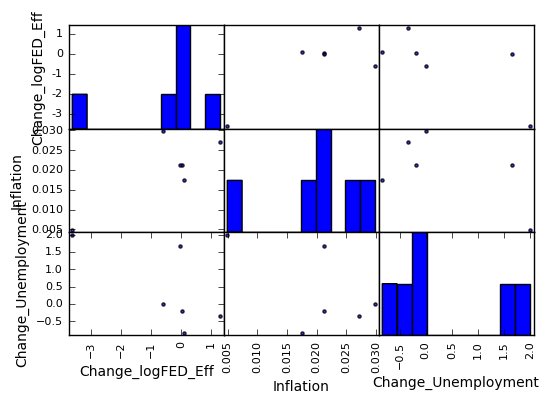

In [56]:
# plt.scatter(MU[:,0],MU[:,1],c = range(len(rList)))
pd.tools.plotting.scatter_matrix(pd.DataFrame((MU),columns=target),alpha = 0.8)

In [30]:
pd.options.display.float_format = '{:20,.2f}'.format
df['State'] = 'Stable'
df['State'] = np.argmax(df[rList].values, axis=1)
# colorList = np.dot(df[rList].values,np.array(range(len(rList))))

plt.scatter(df[['logFED_Eff']].values,df[['Change']].values,c = df['State'].values)

KeyError: "['Change'] not in index"

In [46]:
P

array([[0.479, 0.000, 0.000, 0.280, 0.001, 0.240],
       [0.000, 0.460, 0.000, 0.079, 0.461, 0.000],
       [0.000, 0.000, 0.000, 0.143, 0.003, 0.855],
       [0.388, 0.000, 0.194, 0.223, 0.195, 0.000],
       [0.000, 0.000, 0.000, 0.165, 0.835, 0.000],
       [0.000, 0.466, 0.000, 0.533, 0.001, 0.000]])

In [50]:
for k in range(6):
    print(np.linalg.cond(SIGMA[k]))

32496.6908272
369211896.11
236005345.919
7667.02868402
2064.24112004
21045922.0059


In [ ]:
plt.plot(df.Date,df.Change)

In [57]:
df.loc[np.logical_and(df.Date>'1979-01-01', df.Date<'1983-01-01')]

,Date,FED_Eff,CPI,Unemployment,logFED_Eff,Change_logFED_Eff,ChangePct_logFED_Eff,Inflation,Change_Unemployment,psi0,...,psi2,psi3,psi4,psi5,r0,r1,r2,r3,r4,r5


In [52]:
df.head(50)

,Date,FED_Eff,CPI,Unemployment,logFED_Eff,Change_logFED_Eff,ChangePct_logFED_Eff,Inflation,Change_Unemployment,psi0,...,psi2,psi3,psi4,psi5,r0,r1,r2,r3,r4,r5
0,1995-01-31,5.53,150.50,5.60,5.38,0.00,0.00,0.00,0.00,0.03,...,"218,368.02",0.00,0.16,79.67,0.17,0.18,0.17,0.17,0.16,0.15
12,1996-01-31,5.56,154.70,5.60,5.41,0.03,0.01,0.03,0.00,0.00,...,0.00,287.44,5.17,0.00,0.00,0.00,0.00,0.98,0.02,0.00
24,1997-01-31,5.25,159.40,5.30,5.12,-0.29,-0.06,0.03,-0.30,0.00,...,0.00,43.96,0.04,0.00,0.00,0.00,0.00,1.00,0.00,0.00
36,1998-01-31,5.56,162.00,4.60,5.41,0.29,0.05,0.02,-0.70,0.00,...,0.00,0.00,46.64,0.00,0.00,0.00,0.00,0.00,1.00,0.00
48,1999-01-31,4.63,164.70,4.30,4.53,-0.88,-0.20,0.02,-0.30,0.00,...,0.00,55.03,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
60,2000-01-31,5.45,169.30,4.00,5.31,0.78,0.15,0.03,-0.30,104.13,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
72,2001-01-31,5.98,175.60,4.20,5.81,0.50,0.09,0.04,0.20,0.00,...,0.00,72.29,0.27,0.00,0.00,0.00,0.00,1.00,0.00,0.00
84,2002-01-31,1.73,177.70,5.70,1.72,-4.09,-2.39,0.01,1.50,0.00,...,"3,796,179.90",0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
96,2003-01-31,1.24,182.60,5.80,1.23,-0.48,-0.39,0.03,0.10,0.00,...,0.00,0.00,0.00,"42,332.10",0.00,0.00,0.00,0.00,0.00,1.00
108,2004-01-31,1.00,186.30,5.70,1.00,-0.24,-0.24,0.02,-0.10,0.01,...,0.00,256.99,0.04,0.00,0.00,0.00,0.00,1.00,0.00,0.00
